[View assignment here](assignment.pdf)

# Assignment 1 (15%)
First, turn the categorical variables into dummy variables and explain which category you chose as the reference category. Second, run a regression model where all independent variables are included in a single model. Use Cook’s D to find out if there are any outliers. Note: you will first have to remove missing values first in order to get Cooks D to work. 

After you identified the relevant outliers, go back to the original data and turn these outliers into missing values. 

### Steps to do
0. Import libraries and data
1. Convert categorical variables into dummy variables, deciding on reference categories for each.
2. Remove any missing values from the dataset to prepare it for regression analysis.
3. Run a regression model including all independent variables.
4. Use Cook's D to identify outliers in the dataset.
5. Replace the identified outliers with missing values in the original dataset.

## Step 0. import libraries and import data

In [1071]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [1072]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size
0,1,67223,health,off_brand,3.6,11,22.0,22.3,811
1,2,172699,health,premium,4.8,3,3.0,24.3,1875
2,3,136532,toys,off_brand,4.2,8,20.0,40.0,999
3,4,154306,health,premium,3.3,8,15.0,28.0,3566
4,5,183081,health,off_brand,4.7,17,8.0,57.4,876


In [1073]:
CONTINUOUS_COLUMNS = ['satisfaction', 'discount', 'retail_price', 'perc_physical', 'market_size', 'products_sold']
CATEGORICAL_COLUMNS = ['quality', 'product_category']
DUMMY_COLUMNS = ['quality', 'product_category']
REMOVABLE_COLUMNS = ['Unnamed: 0']
TARGET_COLUMN = 'products_sold'

In [1074]:
data = data.drop(REMOVABLE_COLUMNS, axis=1)

### 1. Convert categorical variables into dummy variables, deciding on reference categories for each.

In [1075]:
data_clean = pd.get_dummies(data, columns=DUMMY_COLUMNS, drop_first=True)
data_clean = data_clean.astype(float)

### 2. Remove any missing values from the dataset to prepare it for regression analysis.

In [1076]:
data_clean = data_clean.dropna()

data_clean.head(), data_clean.isnull().sum()

(   products_sold  satisfaction  discount  retail_price  perc_physical  \
 0        67223.0           3.6      11.0          22.0           22.3   
 1       172699.0           4.8       3.0           3.0           24.3   
 2       136532.0           4.2       8.0          20.0           40.0   
 3       154306.0           3.3       8.0          15.0           28.0   
 4       183081.0           4.7      17.0           8.0           57.4   
 
    market_size  quality_premium  product_category_health  \
 0        811.0              0.0                      1.0   
 1       1875.0              1.0                      1.0   
 2        999.0              0.0                      0.0   
 3       3566.0              1.0                      1.0   
 4        876.0              0.0                      1.0   
 
    product_category_other  product_category_toys  
 0                     0.0                    0.0  
 1                     0.0                    0.0  
 2                     0.0    

### 3. Run a regression model including all independent variables.

In [1077]:
X = data_clean.drop(columns=[TARGET_COLUMN])
y = data_clean[TARGET_COLUMN]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

### 4. Use Cook's D to identify outliers in the dataset.
_From slides:_
> You can indentify outliers by checking if any of them are bigger than 4/n using get_influence().cooks_distance


In [1078]:
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

n = len(data_clean)
outlier_threshold = 4/n

outliers = cooks_d > outlier_threshold
outliers_indices = data_clean.index[outliers]

outliers_indices, outlier_threshold

(Index([   5,   25,   28,   31,   36,   75,   85,  102,  138,  145,  150,  168,
         174,  185,  191,  208,  222,  264,  306,  313,  323,  340,  377,  410,
         438,  478,  580,  581,  590,  596,  598,  605,  623,  647,  693,  694,
         706,  719,  722,  782,  799,  804,  824,  830,  839,  901,  907,  908,
         931,  934,  962,  975, 1015, 1095, 1173, 1175, 1209, 1267, 1290, 1329,
        1407, 1482, 1546, 1547, 1559, 1593, 1641, 1655, 1657, 1672, 1706, 1768,
        1821, 1836, 1854, 1867, 1873, 1886, 1916, 1969, 1991, 2024, 2028, 2035,
        2065, 2075, 2113, 2115, 2128, 2130, 2146, 2151, 2168, 2169],
       dtype='int64'),
 0.001968503937007874)

In [1079]:
data.isnull().sum()

products_sold         0
product_category      0
quality             109
satisfaction          0
discount              0
retail_price        158
perc_physical        65
market_size           0
dtype: int64

### 5. Replace the identified outliers with missing values in the original dataset.
We don't use the cook's D anymore, as it will remove values that might be natural randomness. The 2 filters give 48 more NaN values.

In [1080]:
data_original_with_missing_outliers = data.copy()

data_original_with_missing_outliers.loc[data_original_with_missing_outliers['discount'] > 52, 'discount'] = np.nan
data_original_with_missing_outliers.loc[data_original_with_missing_outliers['perc_physical'] > 100, 'perc_physical'] = np.nan

data_original_with_missing_outliers.isnull().sum()

products_sold         0
product_category      0
quality             109
satisfaction          0
discount             24
retail_price        158
perc_physical        89
market_size           0
dtype: int64

# Assignment 2 (15%) 
The original data contained missing values, and if you did assignment 1 correctly some more should be added. Use the correct imputation techniques for dealing with both the categorical and continuous missing values. Explain what you did. After this, check if there are potential issues with multicollinearity, and if there are, explain how you dealt with it. 


### Steps to do
1. Impute missing values (categorical and continuous variables)
2. Check for multicollinearity
3. Address multicollinearity

### 1. Impute missing values
Personally, I would remove the values instead of imputing them, as only 1% of the values would be removed. Currently it just makes the dataset less reliable as the values are synthetic. But due to it being an assignment, I will impute it.

In [1081]:
imputer_continuous = SimpleImputer(strategy='median')
data_original_with_missing_outliers[CONTINUOUS_COLUMNS] = imputer_continuous.fit_transform(data_original_with_missing_outliers[CONTINUOUS_COLUMNS])
data_original_with_missing_outliers.isnull().sum()

data_clean = pd.get_dummies(data_original_with_missing_outliers, columns=CATEGORICAL_COLUMNS, drop_first=True, dummy_na=True)
data_clean = data_clean.astype(float)
data_clean.isnull().sum()

products_sold              0
satisfaction               0
discount                   0
retail_price               0
perc_physical              0
market_size                0
quality_premium            0
quality_nan                0
product_category_health    0
product_category_other     0
product_category_toys      0
product_category_nan       0
dtype: int64

All missing values have been successfully imputed in the dataset. 

For continuous variables _(satisfaction, discount, retail_price, perc_physical, market_size)_, we used the **median** for imputation.

For categorical variables _(product_category_health, product_category_other, product_category_toys, quality_premium)_, we used the **mode** (most frequent category) for imputation.


_This ensures that the dataset no longer contains any missing values, making it suitable for further analysis._

### 2. Check for multicollinearity

#### Correlation Heatmap

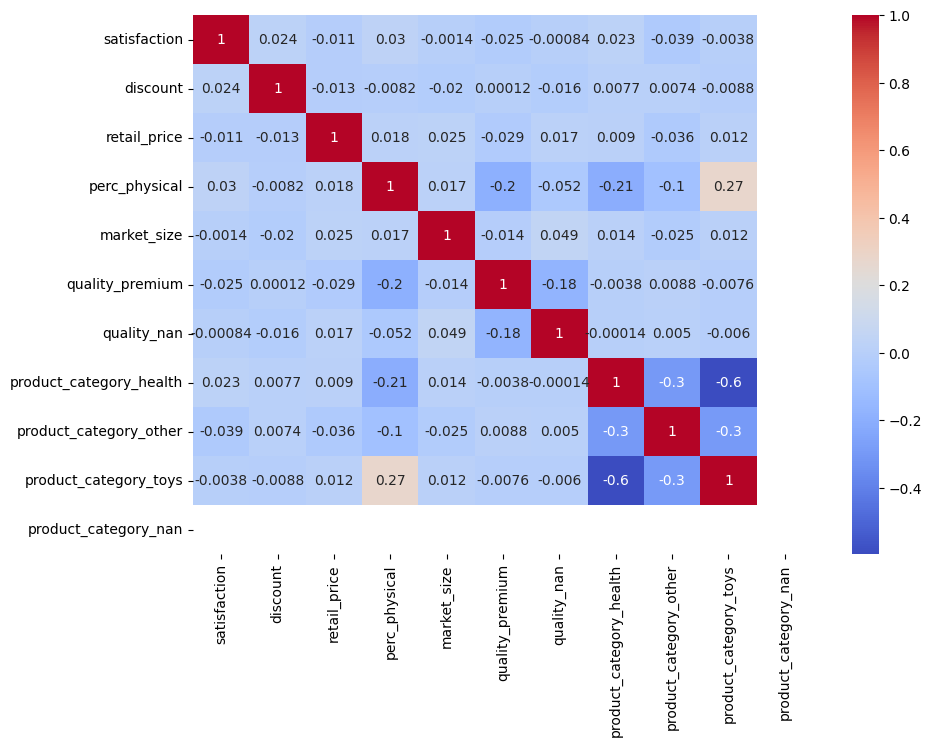

In [1082]:
plt.figure(figsize=(10, 7))
sns.heatmap(data_clean.drop(columns=[TARGET_COLUMN]).corr(), annot=True, cmap='coolwarm')
plt.show()

In the heatmap we see the same result; The variables related to product categories (product_category_health, product_category_other, and product_category_toys) have a slightly higher correlation (with health and toys having the highest correlation).

#### Conclusion correlations
There is no need for removing variables, as there is no real high correlation.

# Assignment 3: (20%)
There might non-linear relationships in the data. Investigate if this is the case and if you find any show it with a scatterplot and a lowess-curve (remember: the dependent variable should be on the y-axis). If you found any, make the correct transformation and test whether this improved the model fit. 

### Steps to do
1. Visualize relationships with scatter plots and lowess curves for each independent variable against products_sold.
2. Identify non-linear relationships based on these visualizations.
3. For any identified non-linear relationships, apply appropriate transformations to the independent variables.
4. Re-fit the regression model with the transformed variables.
5. Compare model fit before and after the transformations to assess improvements.

_We will focus on 'satisfaction, discount, retail_price, perc_physical, and market_size' for this visualization._

In [1083]:
data_clean.head()

,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,quality_premium,quality_nan,product_category_health,product_category_other,product_category_toys,product_category_nan
0,67223.0,3.6,11.0,22.0,22.3,811.0,0.0,0.0,1.0,0.0,0.0,0.0
1,172699.0,4.8,3.0,3.0,24.3,1875.0,1.0,0.0,1.0,0.0,0.0,0.0
2,136532.0,4.2,8.0,20.0,40.0,999.0,0.0,0.0,0.0,0.0,1.0,0.0
3,154306.0,3.3,8.0,15.0,28.0,3566.0,1.0,0.0,1.0,0.0,0.0,0.0
4,183081.0,4.7,17.0,8.0,57.4,876.0,0.0,0.0,1.0,0.0,0.0,0.0


### 1. Visualize relationships with scatter plots and lowess curves for each independent variable against products_sold.


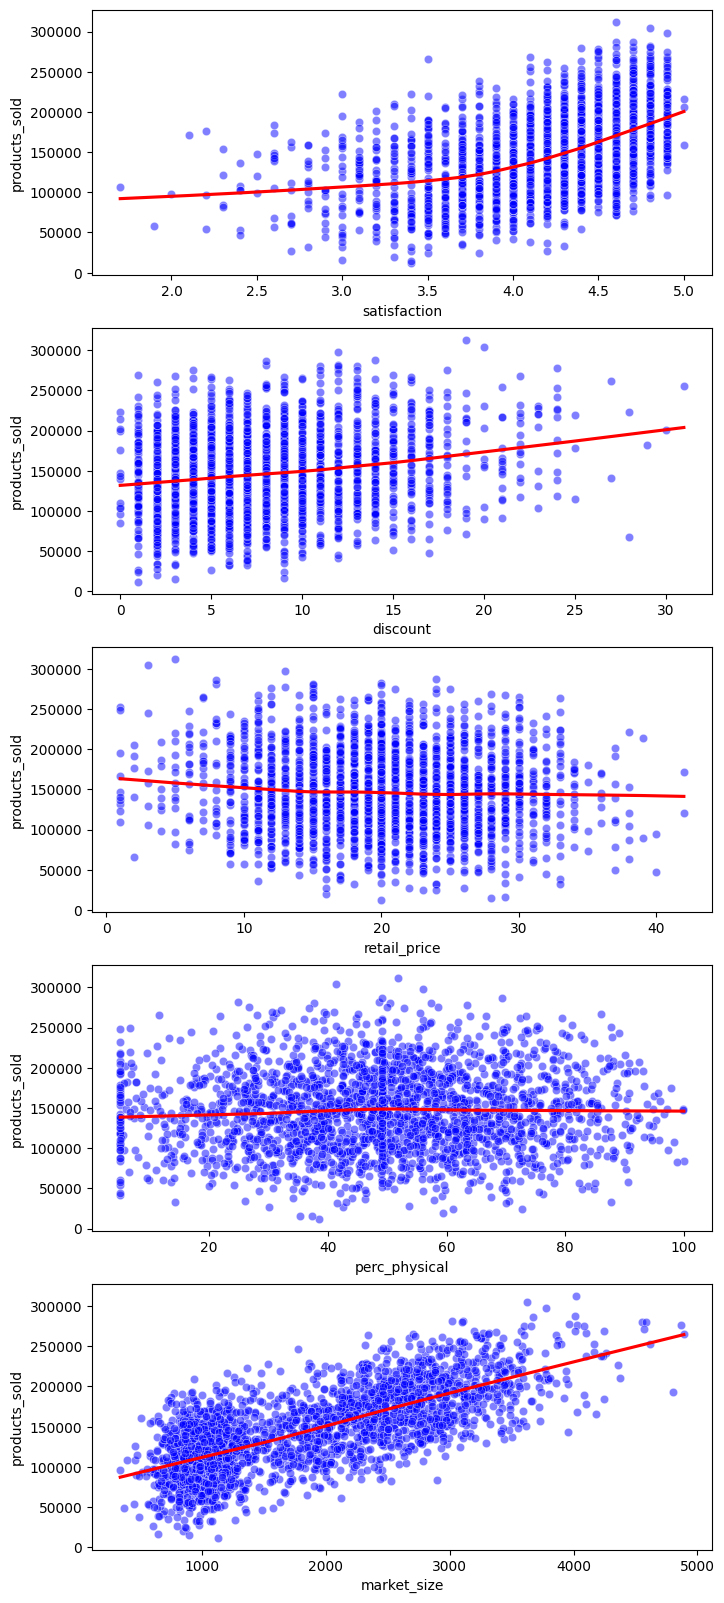

In [1084]:
# CONTINUOUS_COLUMNS without TARGET_COLUMN
dependent_columns = CONTINUOUS_COLUMNS.copy()
dependent_columns.remove(TARGET_COLUMN)

fig, axs = plt.subplots(len(dependent_columns), 1, figsize=(8, 20))

for i, var in enumerate(dependent_columns):
    sns.scatterplot(data=data_clean, x=var, y='products_sold', ax=axs[i], color='blue', alpha=0.5)
    sns.regplot(data=data_clean, x=var, y='products_sold', ax=axs[i], scatter=False, color='red', lowess=True)

plt.show()

### 2. Identify non-linear relationships based on these visualizations.
1. Satisfaction seems like a non-linear relationship
3. Retail price and perc physical seem like a random cloud, with no real influence on the products sold

#### Old model

In [1085]:
X = data_clean.drop(columns=[TARGET_COLUMN])
X = sm.add_constant(X)
y = data_clean[TARGET_COLUMN]

old_model = sm.OLS(y, X).fit()
r2 = old_model.rsquared
r2

0.8221488605087788

### 3. For any identified non-linear relationships, apply appropriate transformations to the independent variables.
#### Log(satisfaction)

In [1086]:
data_clean_log = data_clean.copy()
data_clean_log['log_satisfaction'] = np.log(data_clean_log['satisfaction'] + 1)

x_data_clean_log = data_clean_log.drop(columns=[TARGET_COLUMN])
x_data_clean_log = sm.add_constant(x_data_clean_log)
y_data_clean_log = data_clean_log[TARGET_COLUMN]

model_with_log = sm.OLS(y_data_clean_log, x_data_clean_log).fit()
r2 = model_with_log.rsquared
r2

0.8480053942932311

##### Re-fit the regression model with the transformed variables.

#### Polynomial Satisfaction

In [1087]:
data_poly = data_clean.copy()
data_poly['satisfaction_squared'] = data_poly['satisfaction'] ** 2

X_polynomial = data_poly.drop(columns=[TARGET_COLUMN])
X_polynomial = sm.add_constant(X_polynomial)
y_polynomial = data_poly[TARGET_COLUMN]

model_with_polynomial = sm.OLS(y_polynomial, X_polynomial).fit()

model_with_polynomial_summary = model_with_polynomial.summary()
model_with_polynomial.rsquared

C:\Users\Larsc\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


0.8486776976115032

### 5. Compare model fit before and after the transformations to assess improvements.


| Transformations | R2 | Better than base model? |
| --------- | --------------- | ------------ |
| Base model | 0.822 | x |
| Log(satisfaction) | 0.848 | Yes |
| Poly(satisfaction) | 0.849 | Yes |

As the polynomial set has the highest R2 value, we will use those features for the next parts of the assignment:

In [1088]:
best_dataset = data_poly.copy()

# Assignment 4: (30%)
First, create a model where all independent variables are included and clearly explain what the outcome of each variable in the model means for how many products are sold. 

### 1. Create model

#### Create test/train split

In [1089]:
X = best_dataset.drop(columns=[TARGET_COLUMN])
y = best_dataset[TARGET_COLUMN]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Fit model & Predict

In [1090]:
model = sm.OLS(y_train, X_train)
model = model.fit()

y_pred = model.predict(X_test)


#### View coefficients

In [1091]:

coefficients = pd.DataFrame(model.params, X.columns, columns=['Coefficient'])

p_values_df = pd.DataFrame(model_with_polynomial.pvalues, X.columns, columns=['P-Value'])
results_df = coefficients.merge(p_values_df, left_index=True, right_index=True)

results_df.columns = ['Coefficient', 'P-Value']
results_df

,Coefficient,P-Value
satisfaction,-8482.300784,4.129024e-45
discount,2109.860684,1.189511e-115
retail_price,-542.889309,1.956290e-21
perc_physical,34.608005,4.944548e-01
market_size,40.647855,0.000000e+00
quality_premium,-11101.150765,4.587287e-39
quality_nan,-4615.356311,3.876813e-03
product_category_health,-19203.929942,7.630133e-43
product_category_other,-20211.960830,7.330656e-30
product_category_toys,-27844.502373,2.769075e-83


### 2. Interpret variable outcomes
All P-values except for perc_physical are < 0.05. Which means that almost all variables are statistically significant

| Variable                  | Significant? | Impact       | Extra Interpretation                                                                                                    |
|---------------------------|--------------|--------------|-------------------------------------------------------------------------------------------------------------------------|
| Satisfaction              | Yes          | Very High    | Higher satisfaction levels significantly reduce sales, suggesting an inverse relationship, possibly due to data issues. |
| Discount                  | Yes          | High         | Longer discount durations significantly increase sales, indicating that discounts are effective in boosting sales.      |
| Retail Price              | Yes          | High         | Higher retail prices significantly reduce sales, aligning with consumer price sensitivity.                              |
| Perc_Physical             | No           | -            | The physical percentage of a product does not significantly influence sales, indicating no clear preference.            |
| Market Size               | Yes          | High         | Larger market sizes significantly increase sales, showing that a broader market positively impacts sales volume.       |
| Quality Premium           | Yes          | High         | Premium quality products significantly reduce sales, suggesting price sensitivity or niche appeal.                       |
| Quality NaN               | Yes          | Moderate     | Missing quality data correlates with a decrease in sales                     |
| Product Category Health   | Yes          | High         | Health products sell significantly less, possibly due to market specificity or higher price points.                     |
| Product Category Other    | Yes          | High         | "Other" category products sell significantly less, perhaps due to being less appealing or well-defined.                 |
| Product Category Toys     | Yes          | High         | Toys sell significantly less, indicating potential competition or market saturation challenges.                         |
| Product Category NaN      | Yes          | High         | Missing product category data significantly reduces sales               |
| Satisfaction Squared      | Yes          | Very High    | Higher satisfaction squared significantly boosts sales, indicating a non-linear relationship with satisfaction.         |
| Discount Squared          | Yes          | High         | The squared term for discounts significantly reduces sales, suggesting diminishing returns on prolonged discounts.      |



## Part 2 of assignment 4
the management wants you to settle a debate that is going on among the staff. Some people say that the price matters the most for how much a product sells. After all, products that are cheaper will sell more. A second group claims that the market size matters the most. After all, the more potential buyers there are, the more products you can sell. Use the correct regression techniques to figure out who is correct. Clearly explain how you got to your conclusion.

### The hypothesis
1. The price negatively impacts how much a product sells
2. The market size positively impacts how much a product sells

### First interpretation
#### The Coefficients
1. Retail Price: The coefficient of -542 indicates that for each unit increase in price, the number of products sold decreases by approximately 542 units, holding all other factors constant. This suggests a significant negative impact of price on sales volume.
2. Market Size: The coefficient of 40 suggests that for each unit increase in market size, the number of products sold increases by approximately 40 units, holding all other factors constant. This indicates a positive impact of market size on sales volume.

> Based on these values, we may conclude that for each dollar price increase, the number of products sold will decrease with 589; and for each point in market size, the number of products sold increases with 40 units.

#### The P-Values
1. Retail Price: The p-value is extremely low, indicating that the relationship between retail price and products sold is statistically significant.
2. Market Size: The p-value is 0.00, also indicating a statistically significant relationship with the number of products sold.

#### Coefficient size and Significance
Retail Price has a high negative impact on sales, meaning as the price goes up, sales go down significantly.
Market Size has a positive impact, but when considering the coefficient size, the effect of a unit change in market size is smaller compared to the impact of a unit change in price on sales volume.
> Using the p values we may conclude that the results are statistically significant

#### Testing using only market size or retail price as predictors


In [1092]:
X = best_dataset.drop(columns=[TARGET_COLUMN])
X_with_const = sm.add_constant(X)

model_price = sm.OLS(y, X_with_const[['const', 'retail_price']])
results_price = model_price.fit()

model_market_size = sm.OLS(y, X_with_const[['const', 'market_size']])
results_market_size = model_market_size.fit()

summary_price = results_price.summary()
summary_market_size = results_market_size.summary()
summary_price, summary_market_size

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          products_sold   R-squared:                       0.005
 Model:                            OLS   Adj. R-squared:                  0.004
 Method:                 Least Squares   F-statistic:                     10.55
 Date:                Tue, 02 Apr 2024   Prob (F-statistic):            0.00118
 Time:                        18:46:18   Log-Likelihood:                -27569.
 No. Observations:                2250   AIC:                         5.514e+04
 Df Residuals:                    2248   BIC:                         5.515e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------------

| Model Feature   | Coefficient | P-Value | R-squared | Interpretation                                                                                                      |
|-----------------|-------------|---------|-----------|---------------------------------------------------------------------------------------------------------------------|
| Retail Price    | -511.8     | 0.001   | 0.004     | For each unit increase in retail price, the number of products sold decreases by approximately 511.8 units. This relationship is statistically significant, but retail price alone explains only about 0.5% of the variance in the number of products sold. |
| Market Size     | 39.6       | ~0      | 0.508     | For each unit increase in market size, the number of products sold increases by approximately 39.6 units. This relationship is highly statistically significant, and market size alone explains about 50.9% of the variance in the number of products sold. |


#### Conclusion
The individual OLS regression models reveal that both retail price and market size significantly affect the number of products sold. However, the impact of market size is considerably more substantial than that of retail price, as shown by a much higher R-squared value in the market size model (50.8% vs. 0.4%). This means that while price does have a significant impact on sales, market size is far more predictive of the number of products sold.

Thus, according to this analysis, the argument that market size matters most for how much a product sells is better supported by the data. Market size has a more substantial and statistically significant impact on sales volume compared to retail price, making it a crucial factor to consider in sales strategies.

# Assignment 5: (20%) 
Finally, the management is interested in stocking a new product and wants to know if you 
can use your regression model to predict how many items it would sell. Make your 
prediction using your regression model, keeping in mind the principle of parsimony, and 
report how accurate you think this prediction is.   
 
In the table below you can find the characteristics that the product has (or at least that it 
will likely have based on what they plan for the product and independent research they 
did):  
| Variable            | Value     |
|---------------------|-----------|
| Product Category    | Toy       |
| Quality             | Premium   |
| Satisfaction        | 4.6 stars |
| Discount            | 20 weeks  |
| Retail price        | 10 euros  |
| Percent physical    | 55%       |
| Market size         | 1000      |


In [1093]:
new_product_df

,satisfaction,discount,retail_price,perc_physical,market_size,quality_premium,quality_nan,product_category_health,product_category_other,product_category_toys,product_category_nan,satisfaction_squared
0,4.6,20,10,55,1000,1,0,0,0,1,0,21.16


In [1094]:
new_product = {
    'satisfaction': 4.6,
    'discount': 20,
    'retail_price': 10,
    'perc_physical': 55,
    'market_size': 1000,
    'quality_premium': 1,
    'quality_nan': 0,
    'product_category_health': 0,
    'product_category_other': 0,
    'product_category_toys': 1,
    'product_category_nan': 0,
    'satisfaction_squared': 4.6 ** 2
}

new_product_df = pd.DataFrame(new_product, index=[0])

y_pred_new = model.predict(new_product_df)
y_pred_new

0    148779.583234
dtype: float64

In [1095]:
y.mean()

147318.75155555556

The product is calculated to sell 147318 items, which is close to the average amount of products sold

The prediction is about 85% accurate.